Pomysły:
- porównanie ocen użytkowników i krytyków np. na tle runtime i revenue -> 3d
- analiza ocen/zysku w zależności od aktorów / reżysera 
- czy film który dużo zarabia ma dobre oceny?
- gatunek, który najbardziej / najmniej popularny
- po czym rozpoznajemy film? (aktor, reżyser)

TODO:
- zmiana tytułów
- statystyki -> describe
- usunięcie revenue -> null (albo wszyskie z nullami) : analizujemy zyski więc wyrzucami nulle
- plotowanie tego, 2d, 3d
- usunięcie / wyszukanie nietypowych : 3 sigma

- wyekstrahowanie stringów -> aktorzy, filmy,
- czy film który dużo zarabia ma dobre oceny?
- ogarnąć klasteryzacje (k sąsiadów -> dla różnych k) / klasyfikacje w pythonie
- 3d, zrzutować na osie

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('movie_data.csv')

df = df.drop(columns='Rank')
df = df.dropna()

df.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
import numpy as np
import seaborn as sns; sns.set()
from scipy import stats


def outliers_z_score(df, col, z=3):
    z_scores = stats.zscore(df[col])
    abs_z_scores = np.abs(z_scores)
    outliers = df[abs_z_scores > z]
    print(f'Outliers {round((outliers.shape[0]/df.shape[0])*100,2)}% of data')
    return outliers

def remove_outliers_by_column(df, col, z=3):
    z_scores = stats.zscore(df[col])
    abs_z_scores = np.abs(z_scores)
    return df[abs_z_scores <= z]


In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("--- OUTLIERS BASED ON RATING ".ljust(100, '-'))
    print(f"Average: {np.average(df['Rating'])}")
    print(f"Median: {np.median(df['Rating'])}\n")
    print(outliers_z_score(df, 'Rating')[['Title', 'Votes', 'Rating', 'Revenue (Millions)']])

    print("\n--- OUTLIERS BASED ON REVENUE (MILLIONS) ".ljust(100, '-'))
    print(f"Average: {np.average(df['Revenue (Millions)'])}")
    print(f"Median: {np.median(df['Revenue (Millions)'])}\n")
    print(outliers_z_score(df, 'Revenue (Millions)')[['Title', 'Rating', 'Revenue (Millions)']])

    print("\n--- OUTLIERS BASED ON METASCORE ".ljust(100, '-'))
    print(f"Average: {np.average(df['Metascore'])}")
    print(f"Median: {np.median(df['Metascore'])}\n")
    print(outliers_z_score(df, 'Metascore', z=2.5)[['Title', 'Rating', 'Metascore']])

--- OUTLIERS BASED ON RATING -----------------------------------------------------------------------
Average: 6.814319809069212
Median: 6.9

Outliers 0.72% of data
                        Title   Votes  Rating  Revenue (Millions)
63       Fifty Shades of Grey  244474     4.1              166.15
237  The Disappointments Room    4895     3.9                2.41
525       Birth of the Dragon     552     3.9               93.05
616      2307: Winter's Dream     277     4.0               20.76
829            Disaster Movie   77207     1.9               14.17
871      Dragonball Evolution   59512     2.7                9.35

--- OUTLIERS BASED ON REVENUE (MILLIONS) ----------------------------------------------------------
Average: 84.5645584725537
Median: 48.150000000000006

Outliers 2.03% of data
                                          Title  Rating  Revenue (Millions)
12                                    Rogue One     7.9              532.17
35                   Captain America: Civil 

[4.18262991 4.20907906 4.2355282  4.26197735 4.28842649 4.31487563
 4.34132478 4.36777392 4.39422307 4.42067221 4.44712136 4.4735705
 4.50001965 4.52646879 4.55291794 4.57936708 4.60581623 4.63226537
 4.65871452 4.68516366 4.71161281 4.73806195 4.76451109 4.79096024
 4.81740938 4.84385853 4.87030767 4.89675682 4.92320596 4.94965511
 4.97610425 5.0025534  5.02900254 5.05545169 5.08190083 5.10834998
 5.13479912 5.16124827 5.18769741 5.21414655 5.2405957  5.26704484
 5.29349399 5.31994313 5.34639228 5.37284142 5.39929057 5.42573971
 5.45218886 5.478638   5.50508715 5.53153629 5.55798544 5.58443458
 5.61088373 5.63733287 5.66378201 5.69023116 5.7166803  5.74312945
 5.76957859 5.79602774 5.82247688 5.84892603 5.87537517 5.90182432
 5.92827346 5.95472261 5.98117175 6.0076209  6.03407004 6.06051919
 6.08696833 6.11341747 6.13986662 6.16631576 6.19276491 6.21921405
 6.2456632  6.27211234 6.29856149 6.32501063 6.35145978 6.37790892
 6.40435807 6.43080721 6.45725636 6.4837055  6.51015464 6.53660

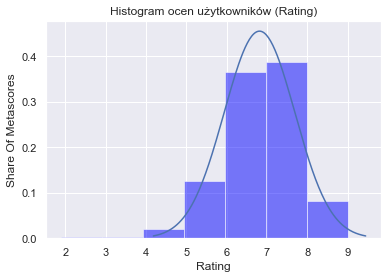

array([0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119332,
       0.00119332, 0.00119332, 0.00119332, 0.00119332, 0.00119

In [14]:
mu = np.average(df['Rating'])
sigma = np.std(df['Rating'])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))


x = df['Rating']
num_bins = 7
weights = np.ones_like(x)/len(x)
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, density=True)

plt.title("Histogram ocen użytkowników (Rating)")
plt.xlabel('Rating')
plt.ylabel('Share Of Metascores')
plt.show()

weights

In [5]:
df

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
993,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [6]:
#todo: usunąć powyższe dane
df = remove_outliers_by_column(df, 'Runtime (Minutes)')
df = remove_outliers_by_column(df, 'Rating')
df = remove_outliers_by_column(df, 'Votes')
df = remove_outliers_by_column(df, 'Revenue (Millions)')
df = remove_outliers_by_column(df, 'Metascore')
# napisać, że nie usuwamy metascore na siłę (dla 3 sigm nie ma elementów odosobnionych)
# w sumie 30 usuniętych elementów na podstawie brakujących danych

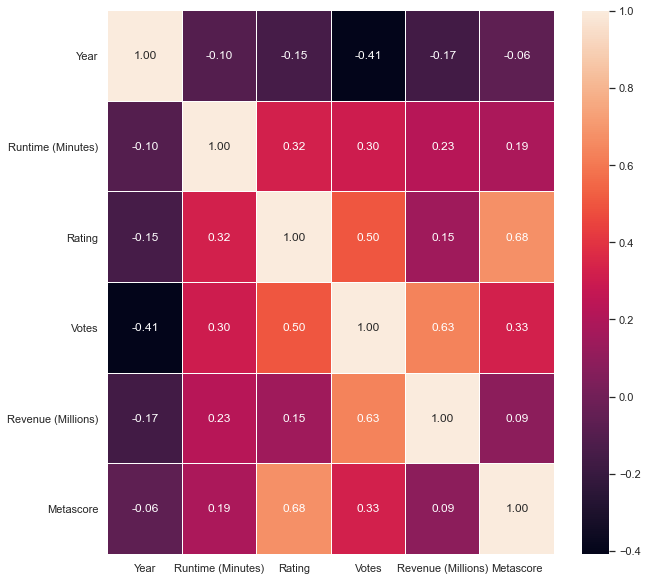

In [7]:
movies_corr = df.corr()
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(movies_corr, annot = True, linewidths = 0.1, fmt= '.2f', ax=ax )
plt.show() #todo: poopowiadać o korelacji między liczbą głosów a oceną

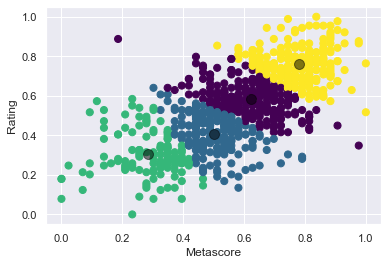

In [8]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

df_1 = df[['Rating', 'Metascore']]

#Scaling
x = df_1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled).values

kmeans = KMeans(n_clusters=4, init='random', random_state=0).fit(x)
y_kmeans = kmeans.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Metascore")
plt.ylabel("Rating")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.title("")
plt.show()
#poopowiadać - szukanie klastrów

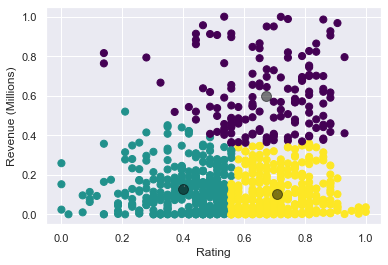

In [9]:
df_1 = df[['Rating', 'Revenue (Millions)']]

#Scaling
x = df_1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_another = pd.DataFrame(x_scaled)
x = df_another.values

kmeans = KMeans(n_clusters=3, init='random', random_state=0).fit(x)
y_kmeans = kmeans.predict(x)
#result = pd.concat([df1, df4], axis=1)
df_another = pd.concat([df_another, pd.DataFrame(y_kmeans, columns=["nazwa"])], axis=1)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Rating')
plt.ylabel('Revenue (Millions)')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.show()
#todo: opowiedzieć - czemu nie ma 4 grupy (słabe zarobki i dobry rating)
#todo: skąd się biorą filmy z zielonej grupy
# ten podział jest nieco sztuczny więc nie ma sensu przewidywać do której grupy będzie należał dany film

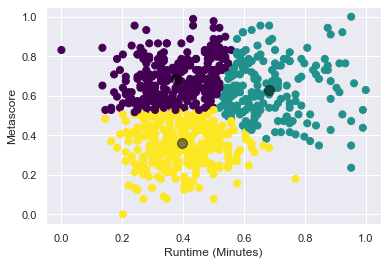

In [10]:
df_1 = df[['Runtime (Minutes)', 'Metascore']]

#Scaling
x = df_1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_another = pd.DataFrame(x_scaled)
x = df_another.values

kmeans = KMeans(n_clusters=3, init='random', random_state=0).fit(x)
y_kmeans = kmeans.predict(x)
#result = pd.concat([df1, df4], axis=1)
df_another = pd.concat([df_another, pd.DataFrame(y_kmeans, columns=["nazwa"])], axis=1)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Metascore')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.show()

## Klasyfikacja

Create dataframe with labels from clustering

In [11]:
labeled_data = {'revenue': df['Revenue (Millions)'], 'rating': df['Rating'], 'metascore': df['Metascore'], 'labels': y_kmeans}

df_data_labels = pd.DataFrame(labeled_data)
df_data = df_data_labels[["revenue", "rating", "metascore"]]
df_labels = df_data_labels[["labels"]]

### Drzewa decyzyjne

Text(0.5, 0.98, 'a')

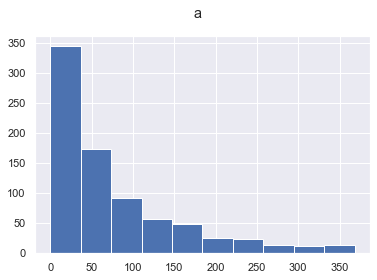

In [12]:
df['Revenue (Millions)'].hist()

Text(0.5, 0.98, 'Revenue (Milions) histogram')

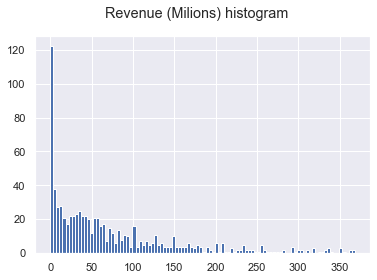

In [27]:
import pylab as pl
df[df['Revenue (Millions)'] < 400]['Revenue (Millions)'].hist(bins=100)
pl.suptitle('Revenue (Milions) histogram')

In [14]:
# Podział wynika z powyższych histogramów
# 1 milion dochodów jest charakterystyczny
# potem idziemy zgodnie ze skalą logarytmiczną
# ale tylko w 2 krokach (w sumie 3 grupy)
def get_revenue_group(revenue):
    if revenue < 1:
        return 0
    if revenue >= 1 and revenue < 100:
        return 1
    return 2

In [15]:
df['Revenue Group'] = df['Revenue (Millions)'].apply(get_revenue_group)
df

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Revenue Group
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,2
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,2
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,2
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,2
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
993,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0,1
994,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0,1
996,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,1
997,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,1


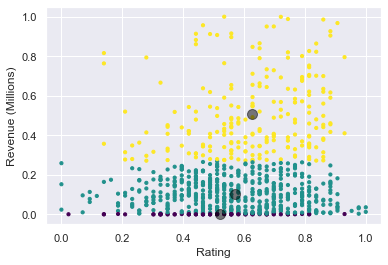

In [16]:
df_1 = df[['Rating', 'Revenue (Millions)', 'Revenue Group']]

#Scaling
x = df_1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_another = pd.DataFrame(x_scaled)
x = df_another.values

kmeans = KMeans(n_clusters=3, init='random', random_state=0).fit(x)
y_kmeans = kmeans.predict(x)
#result = pd.concat([df1, df4], axis=1)
df_another = pd.concat([df_another, pd.DataFrame(y_kmeans, columns=["nazwa"])], axis=1)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=10, cmap='viridis')
plt.xlabel('Rating')
plt.ylabel('Revenue (Millions)')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.show()

Text(0, 0.5, 'Rating')

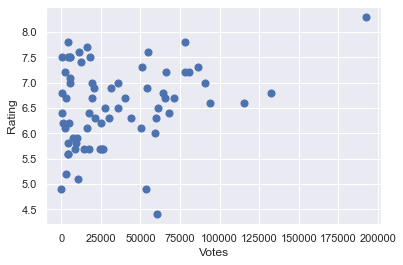

In [17]:
dftemp = df[df['Revenue Group'] == 0]
plt.scatter(dftemp['Votes'].values, dftemp['Rating'].values, s=50, cmap='viridis')
plt.xlabel('Votes')
plt.ylabel('Rating')
#słabo dochodowe filmy -> 

Text(0, 0.5, 'Rating')

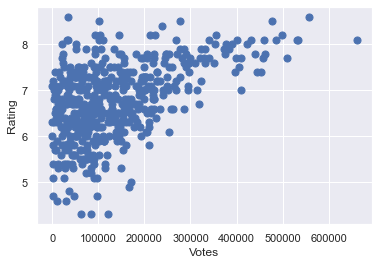

In [18]:
dftemp = df[df['Revenue Group'] == 1]
plt.scatter(dftemp['Votes'].values, dftemp['Rating'].values, s=50, cmap='viridis')
plt.xlabel('Votes')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

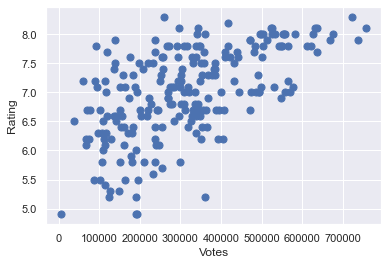

In [19]:
dftemp = df[df['Revenue Group'] == 2]
plt.scatter(dftemp['Votes'].values, dftemp['Rating'].values, s=50, cmap='viridis')
plt.xlabel('Votes')
plt.ylabel('Rating')
# podobny zakres ocen dla każdej kategorii filmów (4.5-8)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Revenue Group
455,Jagten,Drama,"A teacher lives a lonely life, all the while s...",Thomas Vinterberg,"Mads Mikkelsen, Thomas Bo Larsen, Annika Wedde...",2012,115,8.3,192263,0.61,76.0,0
312,The Babadook,"Drama,Horror","A single mother, plagued by the violent death ...",Jennifer Kent,"Essie Davis, Noah Wiseman, Daniel Henshall, Ha...",2014,93,6.8,132580,0.92,86.0,0
559,Idiocracy,"Adventure,Comedy,Sci-Fi","Private Joe Bauers, the definition of ""average...",Mike Judge,"Luke Wilson, Maya Rudolph, Dax Shepard, Terry ...",2006,84,6.6,115355,0.44,66.0,0
622,Antichrist,"Drama,Horror",A grieving couple retreat to their cabin in th...,Lars von Trier,"Willem Dafoe, Charlotte Gainsbourg, Storm Ache...",2009,108,6.6,94069,0.40,49.0,0
263,Nymphomaniac: Vol. I,Drama,A self-diagnosed nymphomaniac recounts her ero...,Lars von Trier,"Charlotte Gainsbourg, Stellan Skarsgård, Stacy...",2013,117,7.0,90556,0.79,64.0,0


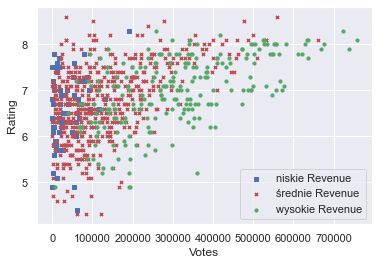

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

dftemp0 = df[df['Revenue Group'] == 0]
dftemp1 = df[df['Revenue Group'] == 1]
dftemp2 = df[df['Revenue Group'] == 2]

ax1.scatter(dftemp0['Votes'].values, dftemp0['Rating'].values, c='b', marker='s', s=10, cmap='viridis', label='niskie Revenue')
ax1.scatter(dftemp1['Votes'].values, dftemp1['Rating'].values, c='r', marker='x', s=10, cmap='viridis', label='średnie Revenue')
ax1.scatter(dftemp2['Votes'].values, dftemp2['Rating'].values, c='g', marker='o', s=10, cmap='viridis', label='wysokie Revenue')

plt.legend()
plt.xlabel('Votes')
plt.ylabel('Rating')

# dla wyskokich revenue mamy wykres mniej stromy wykres oceny od liczby głosów
# jeśli mamy do czynienia z kasowym filmem to to liczba oddanych głosów ma
# mniejszy wpływ na wysoką ocenę (mniej stromy wykres)
# todo: znaleźć ten odstający niebieski punkt - Jagten (Polowanie)
df[df['Revenue Group'] == 0].sort_values("Votes", ascending=False).head(5)

In [21]:
# zielone punkty po prawej na dole to kasowe filmy, bardzo popularne
# ale ludzie okazują się bardziej wybredni przy takim filmie
# te filmy to: Kapitan Ameryka i Thor
df[(df['Revenue Group'] == 2) & (df['Votes'] > 500000)].sort_values("Rating", ascending=True).head(5)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Revenue Group
195,Captain America: The First Avenger,"Action,Adventure,Sci-Fi","Steve Rogers, a rejected military soldier tran...",Joe Johnston,"Chris Evans, Hugo Weaving, Samuel L. Jackson,H...",2011,124,6.9,547368,176.64,66.0,2
450,Iron Man 2,"Action,Adventure,Sci-Fi",With the world now aware of his identity as Ir...,Jon Favreau,"Robert Downey Jr., Mickey Rourke, Gwyneth Palt...",2010,124,7.0,556666,312.06,57.0,2
101,Thor,"Action,Adventure,Fantasy",The powerful but arrogant god Thor is cast out...,Kenneth Branagh,"Chris Hemsworth, Anthony Hopkins, Natalie Port...",2011,115,7.0,570814,181.02,57.0,2
294,Man of Steel,"Action,Adventure,Fantasy","Clark Kent, one of the last of an extinguished...",Zack Snyder,"Henry Cavill, Amy Adams, Michael Shannon, Dian...",2013,143,7.1,577010,291.02,55.0,2
212,Transformers,"Action,Adventure,Sci-Fi",An ancient struggle between two Cybertronian r...,Michael Bay,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",2007,144,7.1,531112,318.76,61.0,2


Text(0, 0.5, 'Rating')

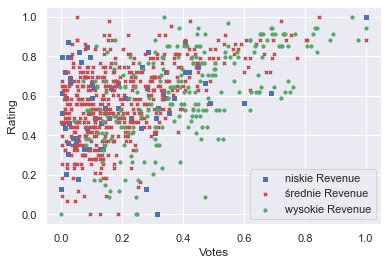

In [22]:
#todo: skalowanie tego wykresu
fig = plt.figure()
ax1 = fig.add_subplot(111)

dftemp0 = df[df['Revenue Group'] == 0]
dftemp1 = df[df['Revenue Group'] == 1]
dftemp2 = df[df['Revenue Group'] == 2]

maximumVotes = max(dftemp0['Votes'].values)
minimumVotes = min(dftemp0['Votes'].values)
maximumRating = max(dftemp0['Rating'].values)
minimumRating = min(dftemp0['Rating'].values)
x = [(element - minimumVotes) / (maximumVotes - minimumVotes) for element in dftemp0['Votes'].values]
y = [(element - minimumRating) / (maximumRating - minimumRating) for element in dftemp0['Rating'].values]
ax1.scatter(x, y, c='b', marker='s', s=10, cmap='viridis', label='niskie Revenue')

maximumVotes = max(dftemp1['Votes'].values)
minimumVotes = min(dftemp1['Votes'].values)
maximumRating = max(dftemp1['Rating'].values)
minimumRating = min(dftemp1['Rating'].values)
x = [(element - minimumVotes) / (maximumVotes - minimumVotes) for element in dftemp1['Votes'].values]
y = [(element - minimumRating) / (maximumRating - minimumRating) for element in dftemp1['Rating'].values]
ax1.scatter(x, y, c='r', marker='x', s=10, cmap='viridis', label='średnie Revenue')

maximumVotes = max(dftemp2['Votes'].values)
minimumVotes = min(dftemp2['Votes'].values)
maximumRating = max(dftemp2['Rating'].values)
minimumRating = min(dftemp2['Rating'].values)
x = [(element - minimumVotes) / (maximumVotes - minimumVotes) for element in dftemp2['Votes'].values]
y = [(element - minimumRating) / (maximumRating - minimumRating) for element in dftemp2['Rating'].values]
ax1.scatter(x, y, c='g', marker='o', s=10, cmap='viridis', label='wysokie Revenue')

plt.legend()
plt.xlabel('Votes')
plt.ylabel('Rating')

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['Runtime (Minutes)', 'Rating']], df['Revenue Group'], test_size=0.3, random_state=42)

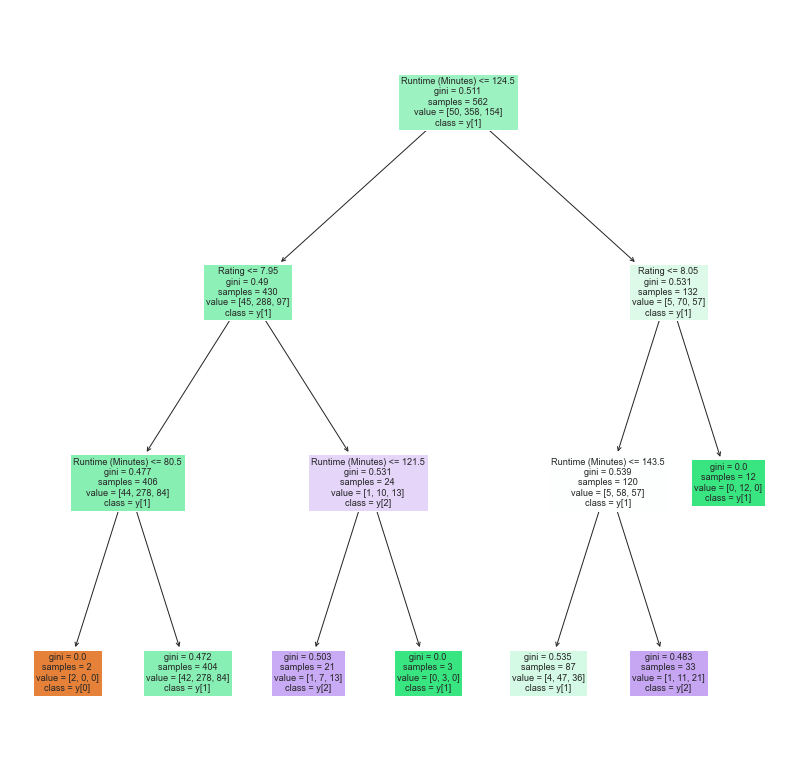

In [39]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=42, max_depth=3)
clf = clf.fit(x_train, y_train)
#todo: dodać więcej kolumn do x_train

#tree.plot_tree(clf, feature_names=['Runtime (Minutes)', 'Rating'], class_names=True, filled=True)
plt.figure(figsize=(14, 14))
tree.plot_tree(clf, feature_names=['Runtime (Minutes)', 'Rating'], class_names=True, filled=True)  
plt.savefig('tree.png',format='png',bbox_inches = "tight")
#todo: powyrzucać kolumny

In [25]:
x_train

,Runtime (Minutes),Rating
370,89,6.0
472,158,5.8
176,130,7.6
781,117,6.5
701,106,7.0
...,...,...
98,105,6.3
145,144,8.1
333,150,7.4
531,92,5.4


In [26]:
df.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Revenue Group'],
      dtype='object')